# Q1a)

In [1]:
#Importing the required modules
import numpy as np
import scipy.special as sc
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import scipy.constants as C
from scipy import integrate
from scipy.optimize import curve_fit

In [2]:
#Some general notes:
# 1. In this code, I haven't considered the 3F/4pi factor to be 1. So, basically, I chose
#    F to be 4pi/3. 
# 2. I am taking tau from 0 to 50, in steps of 0.1.
# 3. For the lambda iterations, I use scipy.integrate.quad to integrate from t=0 to t=60. 
#    Technically, the integration should be from t=0 to t=inf, but the resulting q stays 
#    the same for any large values of the upper limit, so I consider upper limit to be 60 
#    here.


In [3]:
#Defining the nth exponential integral
def expo_integral(n, var):
    return sc.expn(n, var)    

In [4]:
#Getting the function which we have to integrate for the first iteration, 
#where S = (t + 2/3).
def initial_func(t, tau):
    return (t + 2/3)*expo_integral(1, abs(t - tau))/2

In [5]:
#The first three terms of the Chandrashekhar's solution (CS) for q(tau). I will fit the 
#numerical q values after each iteration with this function to get q(tau).
def fit_q(t, l1, k1, l2, k2, l3, k3):
    return l1*np.exp(-k1*t) + l2*np.exp(-k2*t) + l3*np.exp(-k3*t) + 2/3

In [6]:
#After the first iteration is applied, we will get the further iterations by integrating
# this fucntion over t from 0 to 60. 
def func_intergrate(t, l1, k1, l2, k2, l3, k3, tau):
    return (l1*np.exp(-k1*t) + l2*np.exp(-k2*t) + l3*np.exp(-k3*t) + 2/3 + t)*expo_integral(1, abs(t - tau))/2

In [7]:
#Function to remove Nan and Inf values from q.
def remove_nan_inf(tau, q):
    len_q = len(q)
    i = 0
    while i != len_q:
        if np.isnan(q[i]) or np.isinf(q[i]):
            q.remove(q[i])
            tau.remove(tau[i])
            len_q = len_q - 1
        i = i + 1
    return tau, q

In [8]:
#Function to apply lambda operator n times. The q and tau inputs to this function are the 
# q and tau obtained after first iteration. So, applying n iterations through this function
# would mean a total of n + 1 iterations. 
def nlambda_operator(n, tau, q):
    for i in range(n):
        tau, q = remove_nan_inf(tau, q) #Remove nan and inf values from q
        popt, pcov = curve_fit(fit_q, tau, q) #Fit the q with CS
        for j in range(len(tau)): #Apply the iteration for each tau
            J = integrate.quad(func_intergrate, 0, 60, args = (*popt, tau[j]))
            q[j] = J[0] - tau[j] 
            #The lambda iteration gives J. Subtract tau from it to get q. 
    return tau, q

In [9]:
#Same function as above, but making q monotonic before feeding it into the next 
# iteration. 
def mono_nlambda_operator(n, tau, q):
    for i in range(n):
        tau, q = remove_nan_inf(tau, q)
        popt, pcov = curve_fit(fit_q, tau, q)
        for j in range(len(tau)):
            J = integrate.quad(func_intergrate, 0, 60, args = (*popt, tau[j]))
            q[j] = J[0] - tau[j]
        max_q = 0
        index = 0
        for j in range(len(q)):
            if q[j] > q[j+1]:
                max_q = q[j]
                index = j
                break
        for j in range(len(q)):
            if j >= index:
                q[j] = max_q
    return tau, q

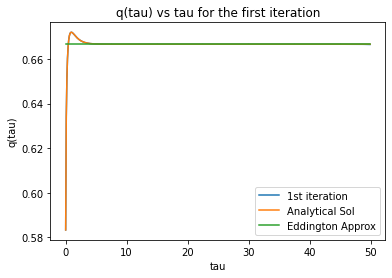

In [49]:
#Getting the first iteration and comparing it with the analytical solution.
q = []
q_check = [] #Array to store the analytical solution of q.
q_EA = [] #Array to store the q for Eddington Approx = 2/3
tau = []
for i in np.arange(0, 50, 0.1): #iterating over tau
    J = integrate.quad(initial_func, 0, 60, args = (i)) #integrating from t=0 to t=60
    q.append(J[0] - i) #Using the fact that J = k(q(tau) + tau) where I assumed k=1
    #Analytical solution for J and the resulting q. 
    J_check = i + 2/3 - 1/3*expo_integral(2, i) + 1/2*expo_integral(3, i)
    q_check.append(J_check - i)
    q_EA.append(2/3)
    tau.append(i)
plt.plot(tau, q, label = "1st iteration")
plt.plot(tau, q_check, label = "Analytical Sol")
plt.plot(tau, q_EA, label = "Eddington Approx")
plt.legend()
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("q(tau) vs tau for the first iteration")
plt.savefig("Fig1.png")
#As can be seen from the below graph, the 1st iteration result and the analytical solution
# completely overlap!

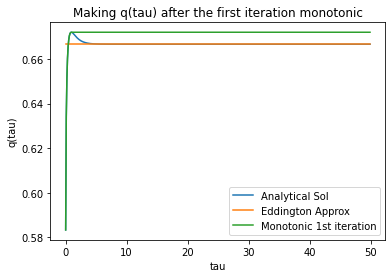

In [50]:
#Same as above, just making q after the first iteration monotonic
q = []
q_check = []
q_EA = []
tau = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i) 
    J_check = i + 2/3 - 1/3*expo_integral(2, i) + 1/2*expo_integral(3, i)
    q_check.append(J_check - i)
    q_EA.append(2/3)
    tau.append(i)
plt.plot(tau, q_check, label = "Analytical Sol")
plt.plot(tau, q_EA, label = "Eddington Approx")
tau, q = remove_nan_inf(tau, q)
index = 0
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
plt.plot(tau, q, label = "Monotonic 1st iteration")
plt.legend()
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("Making q(tau) after the first iteration monotonic")
plt.savefig("Fig2.png")

/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


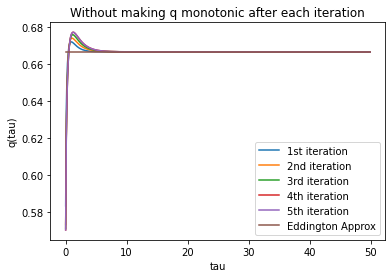

In [82]:
#First 5 iterations for the case where we don't make q after each iteration monotonic. 
# q and tau for Eddington Approximation
q_EA = []
tau_EA = []
for i in np.arange(0, 50, 0.1):
    q_EA.append(2/3)
    tau_EA.append(i)
# 1. 1 iteration
q1 = []
tau1 = []
for i in np.arange(0, 50, 0.1): #iterating over tau
    J = integrate.quad(initial_func, 0, 60, args = (i)) #integrating from t=0 to t=60
    q1.append(J[0] - i)
    tau1.append(i)
tau1, q1 = remove_nan_inf(tau1, q1)
# 2. 2 iterations (1 outside the function and 1 inside the nlambda_operator function)
q = []
tau = []
q2 = []
tau2 = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau2, q2 = nlambda_operator(1, tau, q)
tau2, q2 = remove_nan_inf(tau2, q2)
# 3. 3 iterations (1 outside the function and 2 inside the nlambda_operator function)
q = []
tau = []
q3 = []
tau3 = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau3, q3 = nlambda_operator(2, tau, q)
tau3, q3 = remove_nan_inf(tau3, q3)
# 4. 4 iterations (1 outside the function and 3 inside the nlambda_operator function)
q = []
tau = []
q4 = []
tau4 = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau4, q4 = nlambda_operator(3, tau, q)
tau4, q4 = remove_nan_inf(tau4, q4)
# 5. 5 iterations (1 outside the function and 4 inside the nlambda_operator function)
q = []
tau = []
q5 = []
tau5 = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau5, q5 = nlambda_operator(3, tau, q)
tau5, q5 = remove_nan_inf(tau5, q5)
#Plotting q for the different iterations
plt.plot(tau1, q1, label = "1st iteration")
plt.plot(tau2, q2, label = "2nd iteration")
plt.plot(tau3, q3, label = "3rd iteration")
plt.plot(tau4, q4, label = "4th iteration")
plt.plot(tau5, q5, label = "5th iteration")
plt.plot(tau_EA, q_EA, label = "Eddington Approx")
plt.legend()
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("Without making q monotonic after each iteration")
plt.savefig("Fig3_2.png")

/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


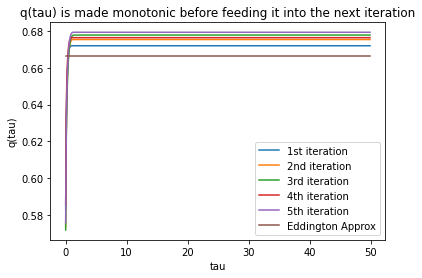

In [83]:
#Same as above, just making q after each iteration monotonic before feeding it into the
# next iteration.
q_EA = []
tau_EA = []
for i in np.arange(0, 50, 0.1):
    q_EA.append(2/3)
    tau_EA.append(i)
# 1. 1 iteration
q1_mono = []
tau1_mono = []
for i in np.arange(0, 50, 0.1): #iterating over tau
    J = integrate.quad(initial_func, 0, 60, args = (i)) #integrating from t=0 to t=60
    q1_mono.append(J[0] - i)
    tau1_mono.append(i)
tau1_mono, q1_mono = remove_nan_inf(tau1_mono, q1_mono)
for j in range(len(q1_mono)):
    if q1_mono[j+1] < q1_mono[j]: 
        max_q = q1_mono[j]
        index = j
        break
for j in range(len(q1_mono)):
    if j >= index:
        q1_mono[j] = max_q
# 2. 2 iterations (1 outside the function and 1 inside the mono_nlambda_operator function)
q = []
tau = []
q2_mono = []
tau2_mono = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau, q = remove_nan_inf(tau, q)
index = 0
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
tau2_mono, q2_mono = mono_nlambda_operator(1, tau, q)
tau2_mono, q2_mono = remove_nan_inf(tau2_mono, q2_mono)
# 3. 3 iterations (1 outside the function and 2 inside the mono_nlambda_operator function)
q = []
tau = []
q3_mono = []
tau3_mono = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau, q = remove_nan_inf(tau, q)
index = 0
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
tau3_mono, q3_mono = mono_nlambda_operator(2, tau, q)
tau3_mono, q3_mono = remove_nan_inf(tau3_mono, q3_mono)
# 4. 4 iterations (1 outside the function and 3 inside the mono_nlambda_operator function
q = []
tau = []
q4_mono = []
tau4_mono = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau, q = remove_nan_inf(tau, q)
index = 0
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
tau4_mono, q4_mono = mono_nlambda_operator(3, tau, q)
tau4_mono, q4_mono = remove_nan_inf(tau4_mono, q4_mono)
# 5. 5 iterations (1 outside the function and 4 inside the mono_nlambda_operator function
q = []
tau = []
q5_mono = []
tau5_mono = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
tau, q = remove_nan_inf(tau, q)
index = 0
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
tau5_mono, q5_mono = mono_nlambda_operator(4, tau, q)
tau5_mono, q5_mono = remove_nan_inf(tau5_mono, q5_mono)
#Plotting q for the different iterations
plt.plot(tau1_mono, q1_mono, label = "1st iteration")
plt.plot(tau2_mono, q2_mono, label = "2nd iteration")
plt.plot(tau3_mono, q3_mono, label = "3rd iteration")
plt.plot(tau4_mono, q4_mono, label = "4th iteration")
plt.plot(tau5_mono, q5_mono, label = "5th iteration")
plt.plot(tau_EA, q_EA, label = "Eddington Approx")
plt.legend()
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("q(tau) is made monotonic before feeding it into the next iteration")
plt.savefig('Fig4_2.png')

# Q2a)

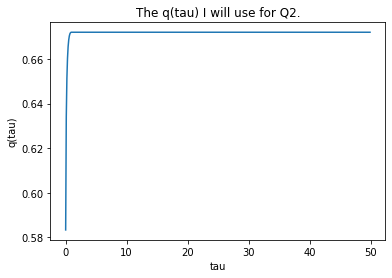

In [56]:
#Defining the q and tau to use (first iteration)
q = []
tau = []
#tau is iterating over 0 to 50 in steps of 0.1. So there are 500 grid points, with grid
#spacing equal to 0.1.
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
#If the ith q value is nan or inf, making it equal to the (i-1)th q value. I didn't
#remove these values because we want q at equally spaced grid points.
for j in range(len(q)):
    if np.isnan(q[j]) or np.isinf(q[j]):
        q[j] = q[j-1]
#Making q after the first iteration monotonic.
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
plt.plot(tau, q)
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("The q(tau) I will use for Q2.")
plt.savefig("Fig5.png")

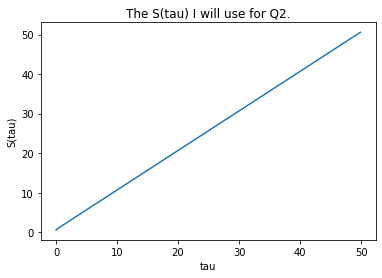

In [57]:
# Using J = S = q(tau) + tau
S = np.array(tau) + np.array(q)
plt.plot(tau, S)
plt.xlabel("tau")
plt.ylabel("S(tau)")
plt.title("The S(tau) I will use for Q2.")
plt.savefig("Fig7.png")
#S(tau) almost varies linearly with tau, with a minute deviation for small tau. 

In [58]:
# Please refer to the report for how I got the components of the matrix A. 
#Taking mu to be 1/sqrt(3) and -1/sqrt(3).  
#tau[0] is the surface, tau[499] is the inner depth. 
mu1 = -1/math.sqrt(3)
dtau = 0.1 
a1 = -mu1**2/dtau**2
a2 = 1 + 2*mu1**2/dtau**2
Amu1 = []
row1 = []
row1.append(1 + (mu1**2 + mu1*dtau)/dtau**2)
row1.append(-mu1**2/dtau**2)
for i in range(2, 500, 1):
    row1.append(0)
Amu1.append(row1)
for i in range(1, 499, 1):
    row = []
    for j in range(500):
        row.append(0)
    row[i] = a2
    row[i - 1] = a1
    row[i + 1] = a1
    Amu1.append(row)
rown = []
for i in range(0, 499):
    rown.append(0)
rown.append(1)
Amu1.append(rown)    
#This gives A for mu = -1/sqrt(3) and dtau = 0.1.

In [59]:
mu2 = 1/math.sqrt(3)
dtau = 0.1 
a1 = -mu2**2/dtau**2
a2 = 1 + 2*mu2**2/dtau**2
Amu2 = []
row1 = []
row1.append(1 + (mu2**2 + mu2*dtau)/dtau**2)
row1.append(-mu2**2/dtau**2)
for i in range(2, 500, 1):
    row1.append(0)
Amu2.append(row1)
for i in range(1, 499, 1):
    row = []
    for j in range(500):
        row.append(0)
    row[i] = a2
    row[i - 1] = a1
    row[i + 1] = a1
    Amu2.append(row)
rown = []
for i in range(0, 499):
    rown.append(0)
rown.append(1)
Amu2.append(rown)   
#This gives A for mu = 1/sqrt(3) and dtau = 0.1.

# Q2b)

In [60]:
# Calculating the inverse of A at mu = -1/sqrt(3) and using j = (A^-1)(S) to get j(tau) 
# for mu = -1/sqrt(3)
Amu1_inv = np.linalg.inv(Amu1)
jmu1 = Amu1_inv.dot(S)

In [61]:
#Using mu*dj/dtau = h and finite differencing to get h(tau) for mu = -1/sqrt(3). 
# Also using boundary conditions to get h at surface and depth.
hmu1 = []
#At surface, j = h
hmu1.append(jmu1[0])
for i in range(1, 499, 1):
    hmu1.append(mu1*(jmu1[i] - jmu1[i-1])/dtau)
#At depth h = 0
hmu1.append(0)

In [62]:
# Calculating the inverse of A at mu = 1/sqrt(3) and using j = (A^-1)(S) to get j(tau) 
# for mu = 1/sqrt(3)
Amu2_inv = np.linalg.inv(Amu2)
jmu2 = Amu2_inv.dot(S)

In [63]:
#Using mu*dj/dtau = h and finite differencing to get h(tau) for mu = 1/sqrt(3). 
# Also using boundary conditions to get h at surface and depth.
hmu2 = []
#At surface, j = h
hmu2.append(jmu2[0])
for i in range(1, 499, 1):
    hmu2.append(mu2*(jmu2[i] - jmu2[i-1])/dtau)
#At depth h = 0
hmu2.append(0)

# Q2c)

In [64]:
#Using the equations j(mu) = 1/2*(I(mu) + I(-mu)) and h(mu) = 1/2*(I(mu) - I(-mu))
Imu1 = np.array(jmu2) - np.array(hmu2)
Imu2 = np.array(jmu2) + np.array(hmu2)
#Using the Gauss–Legendre quadrature we get H. And using F = 4pi*H, we get the flux F.
H = 1/(2*math.sqrt(3))*(np.array(Imu2) - np.array(Imu1))
F = [element * 4*np.pi for element in H]

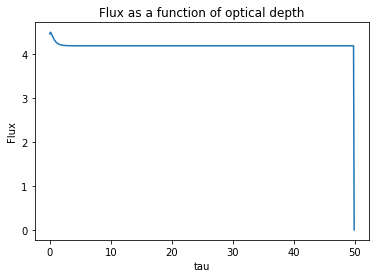

In [65]:
plt.plot(tau, F)
plt.xlabel('tau')
plt.ylabel('Flux')
plt.title('Flux as a function of optical depth')
plt.savefig("Fig6.png")
#As can be seen, flux is almost constant with tau, except for small values of tau.

# Q1 b)

Text(0, 0.5, 'q(tau)')

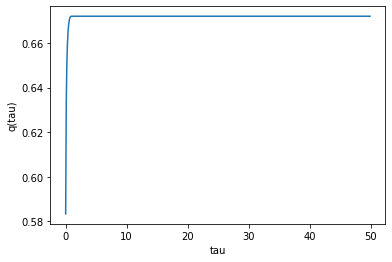

In [71]:
#Defining the q and tau to use (first iteration). This is the monotonic q. 
q = []
tau = []
for i in np.arange(0, 50, 0.1):
    J = integrate.quad(initial_func, 0, 60, args = (i))
    q.append(J[0] - i)
    tau.append(i)
for j in range(len(q)):
    if np.isnan(q[j]) or np.isinf(q[j]):
        q[j] = q[j-1]
for j in range(len(q)):
    if q[j+1] < q[j]: 
        max_q = q[j]
        index = j
        break
for j in range(len(q)):
    if j >= index:
        q[j] = max_q
plt.plot(tau, q)
plt.xlabel("tau")
plt.ylabel("q(tau)")

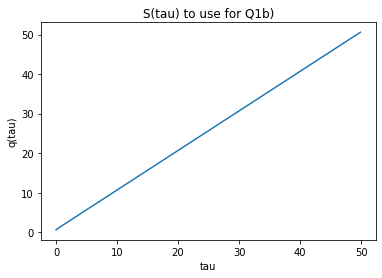

In [72]:
#Using J = S = q(tau) + tau
S = np.array(tau) + np.array(q)
plt.plot(tau, S)
plt.xlabel("tau")
plt.ylabel("q(tau)")
plt.title("S(tau) to use for Q1b)")
plt.savefig("S.png")

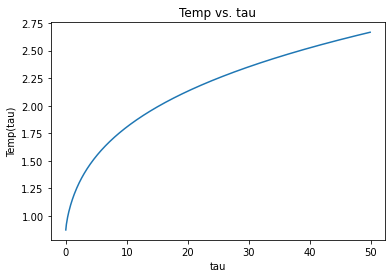

In [73]:
#Using S(tau) = k*T^4(tau), and getting T(tau). Let's assume k to be 1 here.
T = np.power(np.array(S), 1/4)
plt.plot(tau, T)
plt.xlabel('tau')
plt.ylabel('Temp(tau)')
plt.title('Temp vs. tau')
plt.savefig('T.png')

In [74]:
#I will fit T(tau) with a 4 order polynomial function defined below. 
def fit_T(t, a0, a1, a2, a3, a4):
    return a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4

In [75]:
#The function to integrate to get flux for the 1st lambda iteration
def flux_LI(t, a0, a1, a2, a3, a4, freq):
    return ((2*C.Planck*freq**3)/(C.c**2*(math.exp(C.Planck*freq/C.Boltzmann*(a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4)) - 1)))*expo_integral(2, t)

In [76]:
#The Planck function for T=2.7K (CMB)
def planck_function(freq):
    return ((2*C.Planck*freq**3)/(C.c**2*(math.exp(C.Planck*freq/C.Boltzmann*2.7) - 1)))

In [77]:
#The function to integrate to get flux for the Eddington Approx
def flux_EA(t, freq):
    return ((2*C.Planck*freq**3)/(C.c**2*(math.exp(C.Planck*freq/C.Boltzmann*(t + 2/3)**(1/4)) - 1)))*expo_integral(2, t)

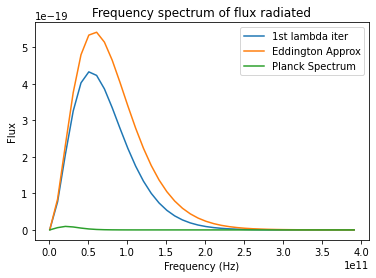

In [78]:
#Getting the radiated flux for the different cases
popt, pcov = curve_fit(fit_T, tau, T) #Fitting T(tau) data points with a 4th order poly
F_LI = [] #List to store flux for 1st lambda iteration
F_EA = [] #List to store flux for Eddington Approx
F_Planck = [] #List to store flux for Planck function at T = 2.7K
freq = []
for i in range(pow(10,9),4*pow(10,11),pow(10,10)):
    F = integrate.quad(flux_LI, 0, 50, args = (*popt, i))
    F_LI.append(2*np.pi*F[0])
    F = integrate.quad(flux_EA, 0, 50, args = (i))
    F_EA.append(2*np.pi*F[0])
    F_Planck.append(planck_function(i))
    freq.append(i)
#Plotting the different fluxes
plt.plot(freq, F_LI, label = '1st lambda iter')
plt.plot(freq, F_EA, label = 'Eddington Approx')
plt.plot(freq, F_Planck, label = 'Planck Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux')
plt.title("Frequency spectrum of flux radiated")
plt.legend()
plt.savefig('Freq_spectrum')

In [79]:
#The function to integrate to get limb darkening for the 1st lambda iteration
def limbdark_LI(t, a0, a1, a2, a3, a4, freq, mu):
    return (((2*C.Planck*freq**3)/(C.c**2*(math.exp(C.Planck*freq/C.Boltzmann*(a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4)) - 1)))*np.exp(-t/mu))/mu

In [80]:
#The function to integrate to get limb darkening for Eddington Approx
def limbdark_EA(t, freq, mu):
    return (((2*C.Planck*freq**3)/(C.c**2*(math.exp(C.Planck*freq/C.Boltzmann*(t+2/3)**(1/4)) - 1)))*np.exp(-t/mu))/mu

/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  import sys
/home/vishwangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if __name__ == '__main__':


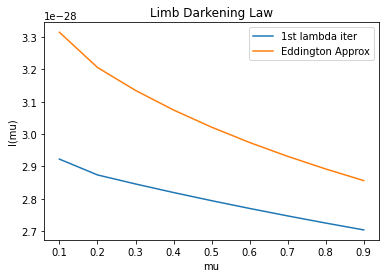

In [81]:
#Getting the limb darkening for the different cases
popt, pcov = curve_fit(fit_T, tau, T) #Fitting T(tau) data points with a 4th order poly
I_LI = [] #List to store limb darkening for 1st lambda iteration
I_EA = [] #List to store limb darkening for Eddington Approx
mu = []
for i in np.arange(0,1,0.1):
    I = integrate.quad(limbdark_LI, 0, 50, args = (*popt, pow(10,6), i))
    I_LI.append(I[0])
    I = integrate.quad(limbdark_EA, 0, 50, args = (pow(10,6), i))
    I_EA.append(I[0])
    mu.append(i)
#Plotting the different I(mu)
plt.plot(mu, I_LI, label = "1st lambda iter")
plt.plot(mu, I_EA, label = "Eddington Approx")
plt.xlabel("mu")
plt.ylabel("I(mu)")
plt.title("Limb Darkening Law")
plt.savefig("LD.png")
plt.legend()